# Feature Selection for Classification

In this demo we will use the Heart Disease dataset, as it contains a class label (yes/no), numerical and nominal features

# Preparation of Dataset

In [2]:
import pandas as pd
import numpy as np

#load heart disease data from csv
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
#Replace column "num" with column "label" and replace values 1-4 with 1
df['label'] = df['num'].replace([1,2,3,4], 1)

#reomve column "num"
df = df.drop(columns=['num'])



In [4]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,label
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
#add a random column with nominal values of the list ['GT','GA', 'GP'] and place it in the middle of the dataframe
df.insert(5, 'mdnr', np.random.choice(['GT','GA', 'GP'], df.shape[0]))
df


,id,age,sex,dataset,cp,mdnr,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,label
0,1,63,Male,Cleveland,typical angina,GA,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,GA,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,GA,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,GA,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,GA,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,GA,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,GP,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,GT,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,GT,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
#a random column with normally distributed values named 'height' with mean 170 and standard deviation 10

df.insert(3, 'height', np.random.normal(170, 10, df.shape[0]))
df

,id,age,sex,height,dataset,cp,mdnr,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,label
0,1,63,Male,181.130643,Cleveland,typical angina,GA,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,170.388634,Cleveland,asymptomatic,GA,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,174.897061,Cleveland,asymptomatic,GA,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,174.538228,Cleveland,non-anginal,GA,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,176.186320,Cleveland,atypical angina,GA,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,163.264923,VA Long Beach,asymptomatic,GA,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,166.539932,VA Long Beach,typical angina,GP,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,183.781090,VA Long Beach,asymptomatic,GT,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,154.268022,VA Long Beach,asymptomatic,GT,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [97]:
#save the dataframe to a new csv file named 'heart_disease_uci_modified.csv'
df.to_csv('heart_disease_uci_modified.csv', index=False)


# Load the modified dataset

In [7]:
#load heart disease data from csv
df = pd.read_csv('heart_disease_uci_modified.csv')

Label: 0 = no heart disease / 1 = heart disease

Features:
- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]


# Explore dataset

In [8]:
df

,id,age,sex,height,dataset,cp,mdnr,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,label
0,1,63,Male,189.450621,Cleveland,typical angina,GA,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,184.106870,Cleveland,asymptomatic,GP,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,156.542477,Cleveland,asymptomatic,GP,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,192.573652,Cleveland,non-anginal,GP,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,166.332530,Cleveland,atypical angina,GA,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,150.632041,VA Long Beach,asymptomatic,GT,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,168.158879,VA Long Beach,typical angina,GT,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,170.177669,VA Long Beach,asymptomatic,GA,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,155.745643,VA Long Beach,asymptomatic,GP,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   height    920 non-null    float64
 4   dataset   920 non-null    object 
 5   cp        920 non-null    object 
 6   mdnr      920 non-null    object 
 7   trestbps  861 non-null    float64
 8   chol      890 non-null    float64
 9   fbs       830 non-null    object 
 10  restecg   918 non-null    object 
 11  thalch    865 non-null    float64
 12  exang     865 non-null    object 
 13  oldpeak   858 non-null    float64
 14  slope     611 non-null    object 
 15  ca        309 non-null    float64
 16  thal      434 non-null    object 
 17  label     920 non-null    int64  
dtypes: float64(6), int64(3), object(9)
memory usage: 129.5+ KB


In [10]:
#describe nominal data
df.describe(include='object')

,sex,dataset,cp,mdnr,fbs,restecg,exang,slope,thal
count,920,920,920,920,830,918,865,611,434
unique,2,4,4,3,2,3,2,3,3
top,Male,Cleveland,asymptomatic,GP,False,normal,False,flat,normal
freq,726,304,496,313,692,551,528,345,196


In [11]:
#describe numerical data
df.describe(include='number')


,id,age,height,trestbps,chol,thalch,oldpeak,ca,label
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,170.048477,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,10.142339,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,136.693078,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,163.514650,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,170.237452,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,176.753359,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,202.845421,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

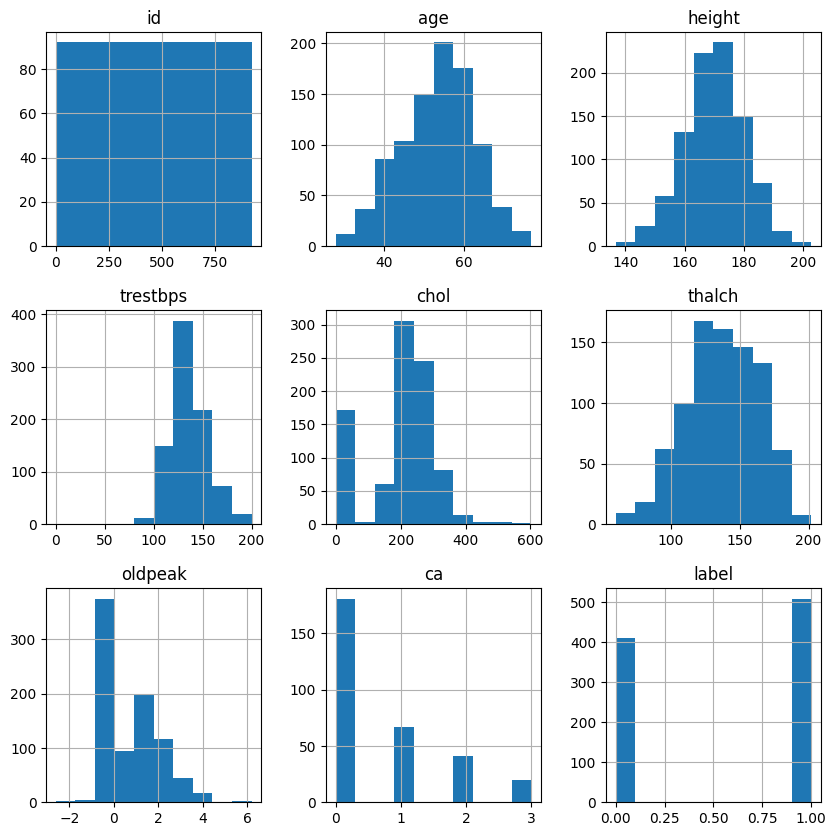

In [12]:
#plot histograms of all numerical data
df.hist(figsize=(10,10))


In [13]:
#show unique values for features with less than 10 unique values
for col in df.columns:
    if df[col].nunique() < 10:
        print(f'{col}: {df[col].unique()}')

sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
mdnr: ['GA' 'GP' 'GT']
fbs: [True False nan]
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang: [False True nan]
slope: ['downsloping' 'flat' 'upsloping' nan]
ca: [ 0.  3.  2.  1. nan]
thal: ['fixed defect' 'normal' 'reversable defect' nan]
label: [0 1]


In [14]:
#create label "survived"
label= df['label']

#separate/remove survived from features
features = df.drop(columns=['label'])

In [15]:
features
#label

,id,age,sex,height,dataset,cp,mdnr,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,189.450621,Cleveland,typical angina,GA,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,184.106870,Cleveland,asymptomatic,GP,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,156.542477,Cleveland,asymptomatic,GP,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,192.573652,Cleveland,non-anginal,GP,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,166.332530,Cleveland,atypical angina,GA,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,150.632041,VA Long Beach,asymptomatic,GT,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,917,62,Male,168.158879,VA Long Beach,typical angina,GT,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,918,55,Male,170.177669,VA Long Beach,asymptomatic,GA,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,919,58,Male,155.745643,VA Long Beach,asymptomatic,GP,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   height    920 non-null    float64
 4   dataset   920 non-null    object 
 5   cp        920 non-null    object 
 6   mdnr      920 non-null    object 
 7   trestbps  861 non-null    float64
 8   chol      890 non-null    float64
 9   fbs       830 non-null    object 
 10  restecg   918 non-null    object 
 11  thalch    865 non-null    float64
 12  exang     865 non-null    object 
 13  oldpeak   858 non-null    float64
 14  slope     611 non-null    object 
 15  ca        309 non-null    float64
 16  thal      434 non-null    object 
dtypes: float64(6), int64(2), object(9)
memory usage: 122.3+ KB


# Feature selection by variance and variation ratio

#### Continuous and discrete features which can be used for variance calculation

In [17]:
variance_features = ['id', 'age', 'height','trestbps', 'chol', 'thalch', 'oldpeak','ca']

In [18]:
#min-max normalize continuous features to be able to compare their variance
normalized_features=[]

for col in variance_features:
    normalized_col = col+'_normalized'
    normalized_features.append(normalized_col)
    features[normalized_col] = (features[col] - features[col].min()) / (features[col].max() - features[col].min())


In [19]:
#describe normalized data
features[normalized_features].describe()

,id_normalized,age_normalized,height_normalized,trestbps_normalized,chol_normalized,thalch_normalized,oldpeak_normalized,ca_normalized
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,0.500000,0.520630,0.504221,0.660662,0.330233,0.546096,0.395317,0.225458
std,0.289146,0.192341,0.153318,0.095330,0.183716,0.182579,0.124003,0.311884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.387755,0.405452,0.600000,0.290216,0.422535,0.295455,0.000000
50%,0.500000,0.530612,0.507078,0.650000,0.369818,0.563380,0.352273,0.000000
75%,0.750000,0.653061,0.605576,0.700000,0.444444,0.683099,0.465909,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#calculate variance for normalized features
features[normalized_features].var().sort_values()

trestbps_normalized    0.009088
oldpeak_normalized     0.015377
height_normalized      0.023506
thalch_normalized      0.033335
chol_normalized        0.033752
age_normalized         0.036995
id_normalized          0.083606
ca_normalized          0.097272
dtype: float64

#### Categorical and discrete features which should be checked with variation ratio


In [21]:
variation_features = ['sex', 'dataset', 'cp', 'fbs', 'mdnr','restecg', 'exang', 'slope', 'ca', 'thal']
non_continous_feature_data=features[variation_features]

In [22]:
#calculate variation ratio for nominal features
#explanation: The value_counts() method counts the number of occurrences of each unique value in the column, 
#and the normalize=True parameter normalizes the counts to represent percentages of the total number of values in the column
non_continous_feature_data_var = non_continous_feature_data.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
non_continous_feature_data_var_ratio=1-non_continous_feature_data_var
non_continous_feature_data_var_ratio.sort_values()

fbs        0.166265
sex        0.210870
exang      0.389595
restecg    0.399782
ca         0.414239
slope      0.435352
cp         0.460870
thal       0.548387
mdnr       0.659783
dataset    0.669565
dtype: float64

# Feature selection for continuous data using correlation

In [23]:
#construct data frame for continuous features and add label 
continous_df=pd.concat([features[variance_features],label],axis=1)
continous_df

,id,age,height,trestbps,chol,thalch,oldpeak,ca,label
0,1,63,189.450621,145.0,233.0,150.0,2.3,0.0,0
1,2,67,184.106870,160.0,286.0,108.0,1.5,3.0,1
2,3,67,156.542477,120.0,229.0,129.0,2.6,2.0,1
3,4,37,192.573652,130.0,250.0,187.0,3.5,0.0,0
4,5,41,166.332530,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...
915,916,54,150.632041,127.0,333.0,154.0,0.0,NaN,1
916,917,62,168.158879,NaN,139.0,NaN,NaN,NaN,0
917,918,55,170.177669,122.0,223.0,100.0,0.0,NaN,1
918,919,58,155.745643,NaN,385.0,NaN,NaN,NaN,0


In [24]:
#calculate correlation between continuous features and label
correlation = continous_df.corr()

<Axes: >

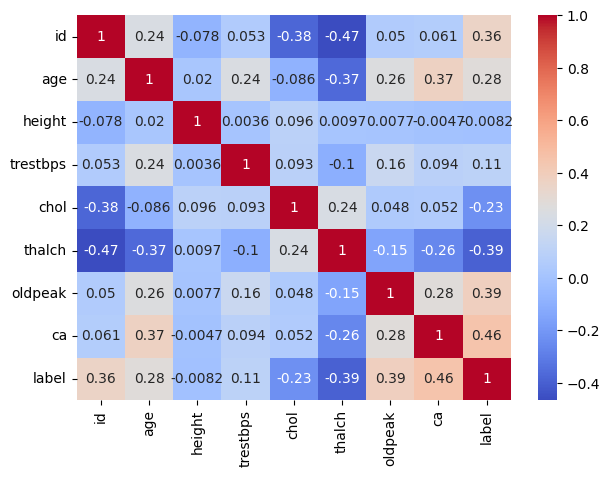

In [25]:
#visualize correlation in a heatmap, low correlation is blue, high correlation is red
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')


# Feature selection for numeric features and nominal label using anova-f statistic

In [26]:
continuous_features=features[variance_features]
#,label

In [27]:
continuous_features.describe()

,id,age,height,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,460.500000,53.510870,170.048477,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,10.142339,19.066070,110.780810,25.926276,1.091226,0.935653
min,1.000000,28.000000,136.693078,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,163.514650,120.000000,175.000000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,170.237452,130.000000,223.000000,140.000000,0.500000,0.000000
75%,690.250000,60.000000,176.753359,140.000000,268.000000,157.000000,1.500000,1.000000
max,920.000000,77.000000,202.845421,200.000000,603.000000,202.000000,6.200000,3.000000


In [28]:
#replace missing values in each column with the mean of the column
continuous_features.fillna(continuous_features.mean(), inplace=True)
continuous_features.describe()


C:\Users\Hendrik Meth\AppData\Local\Temp\ipykernel_13516\2793893743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_features.fillna(continuous_features.mean(), inplace=True)


,id,age,height,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,170.048477,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,10.142339,18.443895,108.957634,25.138494,1.053774,0.541667
min,1.000000,28.000000,136.693078,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,163.514650,120.000000,177.750000,120.000000,0.000000,0.676375
50%,460.500000,54.000000,170.237452,130.000000,221.000000,138.000000,0.800000,0.676375
75%,690.250000,60.000000,176.753359,140.000000,267.000000,156.000000,1.500000,0.676375
max,920.000000,77.000000,202.845421,200.000000,603.000000,202.000000,6.200000,3.000000


In [29]:
#create a new dataframe with p-values of anova test for each numeric feature with label
from scipy.stats import f_oneway
anova_p_values = pd.DataFrame(index=continuous_features.columns, columns=['p-value'])
for i in continuous_features.columns:
    data_anova = pd.concat([continuous_features[i], label], axis=1)
    groups = []
    for j in data_anova['label'].unique():
        groups.append(data_anova[data_anova['label']==j][i])
    stat, p = f_oneway(*groups)
    anova_p_values.loc[i,'p-value'] = p
anova_p_values


,p-value
id,0.0
age,0.0
height,0.803998
trestbps,0.001773
chol,0.0
thalch,0.0
oldpeak,0.0
ca,0.0


# Feature selection for non-continous data using chi2 test (label=class)

In [30]:
#construct a new dataframe with all features except age, fare, Passenger ID and the normalized features
features_non_continous = features[variation_features]
features_non_continous


,sex,dataset,cp,fbs,mdnr,restecg,exang,slope,ca,thal
0,Male,Cleveland,typical angina,True,GA,lv hypertrophy,False,downsloping,0.0,fixed defect
1,Male,Cleveland,asymptomatic,False,GP,lv hypertrophy,True,flat,3.0,normal
2,Male,Cleveland,asymptomatic,False,GP,lv hypertrophy,True,flat,2.0,reversable defect
3,Male,Cleveland,non-anginal,False,GP,normal,False,downsloping,0.0,normal
4,Female,Cleveland,atypical angina,False,GA,lv hypertrophy,False,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...
915,Female,VA Long Beach,asymptomatic,True,GT,st-t abnormality,False,NaN,NaN,NaN
916,Male,VA Long Beach,typical angina,False,GT,st-t abnormality,NaN,NaN,NaN,NaN
917,Male,VA Long Beach,asymptomatic,True,GA,st-t abnormality,False,NaN,NaN,fixed defect
918,Male,VA Long Beach,asymptomatic,True,GP,lv hypertrophy,NaN,NaN,NaN,NaN


In [31]:
#combine features_non_continous with label
non_continous_df = pd.concat([features_non_continous,label],axis=1)
non_continous_df

,sex,dataset,cp,fbs,mdnr,restecg,exang,slope,ca,thal,label
0,Male,Cleveland,typical angina,True,GA,lv hypertrophy,False,downsloping,0.0,fixed defect,0
1,Male,Cleveland,asymptomatic,False,GP,lv hypertrophy,True,flat,3.0,normal,1
2,Male,Cleveland,asymptomatic,False,GP,lv hypertrophy,True,flat,2.0,reversable defect,1
3,Male,Cleveland,non-anginal,False,GP,normal,False,downsloping,0.0,normal,0
4,Female,Cleveland,atypical angina,False,GA,lv hypertrophy,False,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...
915,Female,VA Long Beach,asymptomatic,True,GT,st-t abnormality,False,NaN,NaN,NaN,1
916,Male,VA Long Beach,typical angina,False,GT,st-t abnormality,NaN,NaN,NaN,NaN,0
917,Male,VA Long Beach,asymptomatic,True,GA,st-t abnormality,False,NaN,NaN,fixed defect,1
918,Male,VA Long Beach,asymptomatic,True,GP,lv hypertrophy,NaN,NaN,NaN,NaN,0


In [32]:
# perform chi-squared test for nominal features
from scipy.stats import chi2_contingency

non_cont_columns = non_continous_df.columns

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=non_cont_columns, columns=non_cont_columns)
for i in non_cont_columns:
    for j in non_cont_columns:
        df_chi2 = non_continous_df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p
chi2_values

,sex,dataset,cp,fbs,mdnr,restecg,exang,slope,ca,thal,label
sex,0.0,0.0,0.0,0.014005,0.12183,0.082266,0.0,0.008303,0.14192,0.0,0.0
dataset,0.0,0.0,0.0,0.0,0.649361,0.0,0.0,0.0,0.069254,0.0,0.0
cp,0.0,0.0,0.0,0.089515,0.05883,0.002759,0.0,0.0,0.000652,0.0,0.0
fbs,0.014005,0.0,0.089515,0.0,0.730148,0.000003,0.477991,0.037305,0.04966,0.011285,0.00006
mdnr,0.12183,0.649361,0.05883,0.730148,0.0,0.710279,0.029775,0.93619,0.916205,0.79976,0.056863
restecg,0.082266,0.0,0.002759,0.000003,0.710279,0.0,0.02764,0.054836,0.134939,0.000082,0.002863
exang,0.0,0.0,0.0,0.477991,0.029775,0.02764,0.0,0.0,0.00759,0.0,0.0
slope,0.008303,0.0,0.0,0.037305,0.93619,0.054836,0.0,0.0,0.138053,0.0,0.0
ca,0.14192,0.069254,0.000652,0.04966,0.916205,0.134939,0.00759,0.138053,0.0,0.001786,0.0
thal,0.0,0.0,0.0,0.011285,0.79976,0.000082,0.0,0.0,0.001786,0.0,0.0


In [439]:
#!pip install --upgrade seaborn


<Axes: >

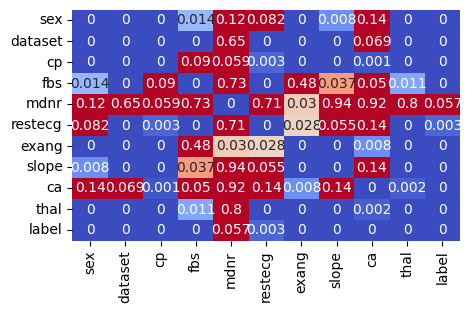

In [33]:
#display chi2 p-values as a color coded heatmap with a threshold of 0.05, round p-values to 2 digits
plt.figure(figsize=(5,3))
sns.heatmap(round(chi2_values.astype(float),3), annot=True, cmap='coolwarm', cbar=False, vmin=0, vmax=0.05)


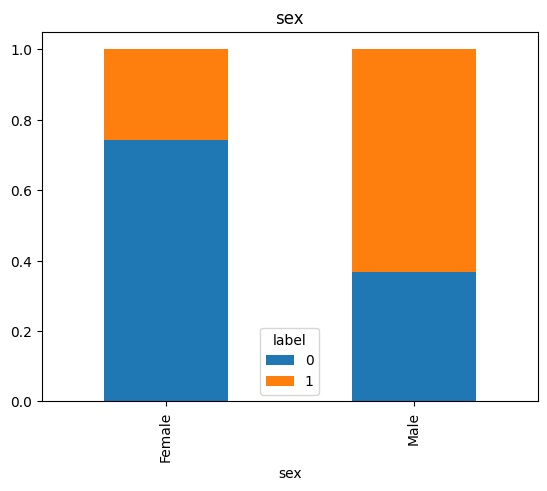

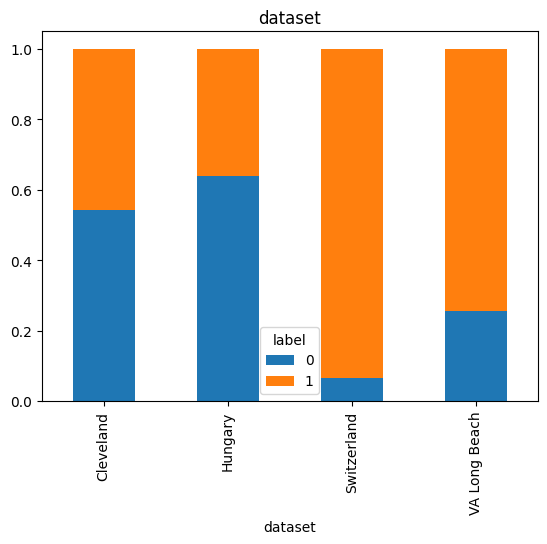

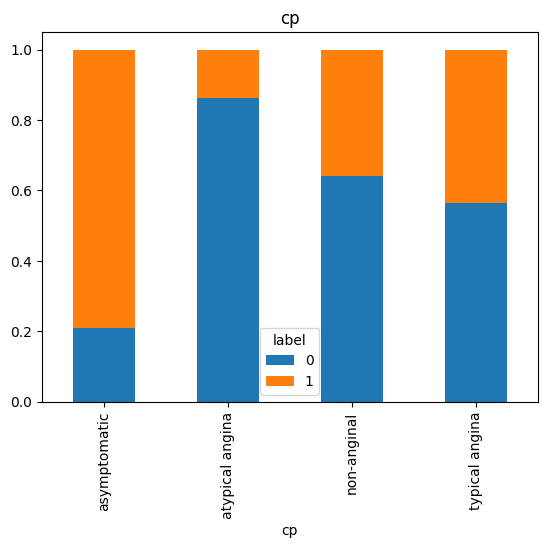

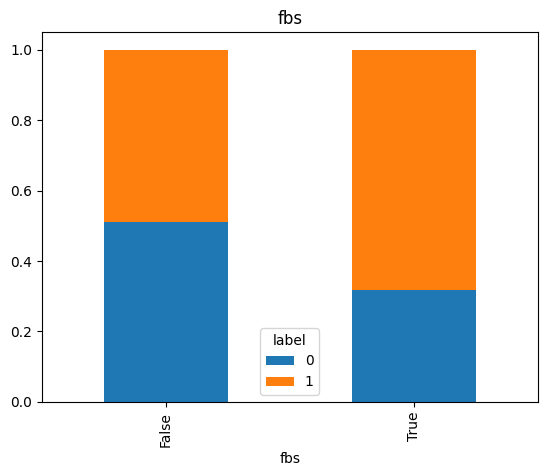

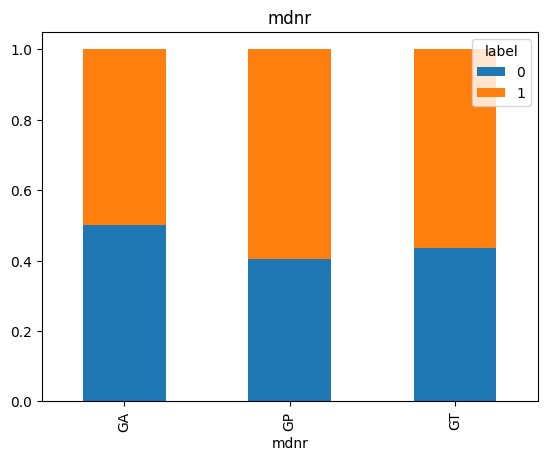

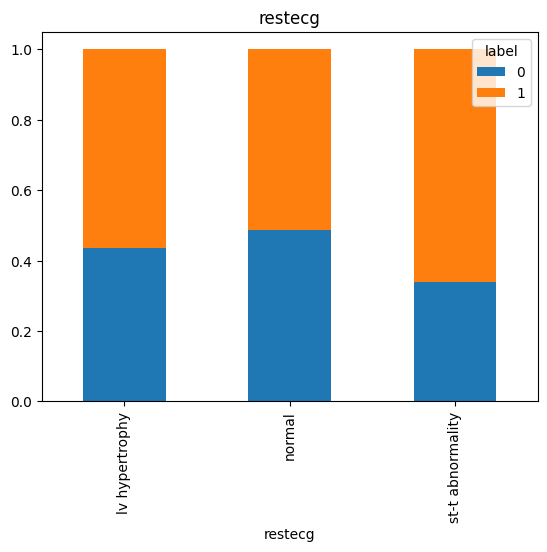

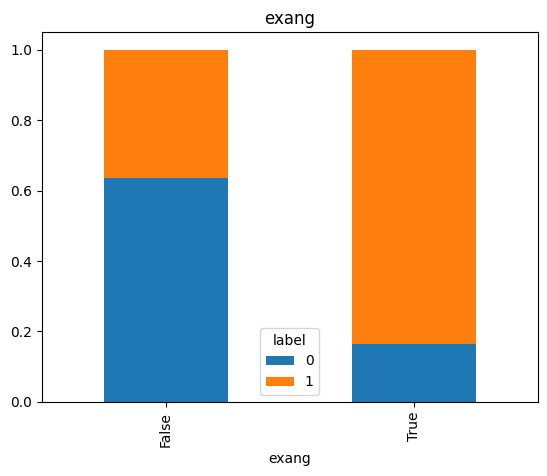

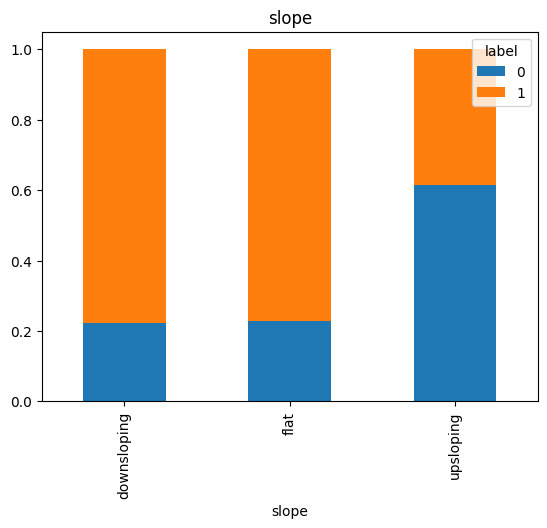

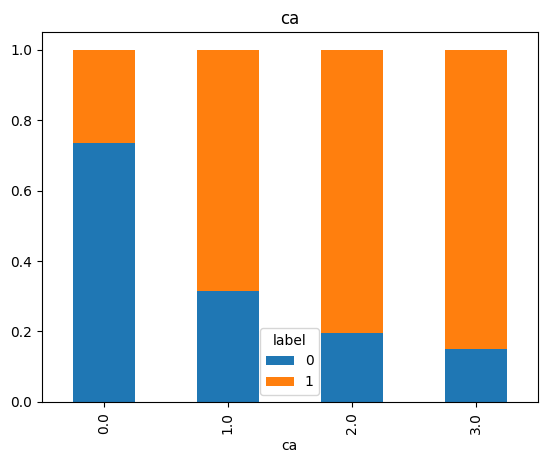

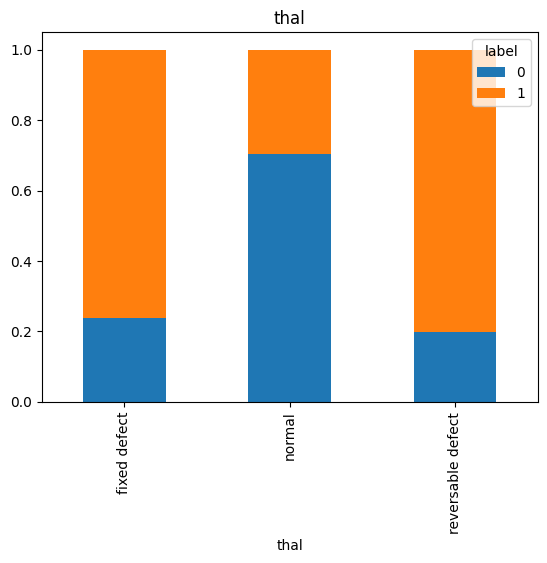

In [34]:
columns_of_interest = variation_features
#create a stacked bar plot of the relative survival/non survial for columns of interest
for col in columns_of_interest:
    data = pd.crosstab(non_continous_df[col], non_continous_df['label'])
    data = data.div(data.sum(axis=1), axis=0)
    data.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()



# Conclusion
- Only height and mdnr can be filtered out, all other features seem to be related with label